<a href="https://colab.research.google.com/github/Miss-Pradhi/ML-LAB-Assignment/blob/main/LAB-7_PCA_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== PART A: Manual PCA on 2×2 Matrix ===

Original Matrix:
 [[2. 0.]
 [0. 2.]]

Centered Matrix:
 [[ 1. -1.]
 [-1.  1.]]

Covariance Matrix:
 [[ 2. -2.]
 [-2.  2.]]

Eigenvalues:
 [4.0000000e+00 4.4408921e-16]

Eigenvectors:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Transformed Data:
 [[ 1.41421356e+00 -2.22044605e-16]
 [-1.41421356e+00  2.22044605e-16]]


=== PART B: Manual PCA on Iris Dataset ===

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Explained Variance Ratio:
 [0.72962445 0.22850762 0.03668922 0.00517871]

Principal Components (Top 2):
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]

Transformed Data (First 5 rows):
 [[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67

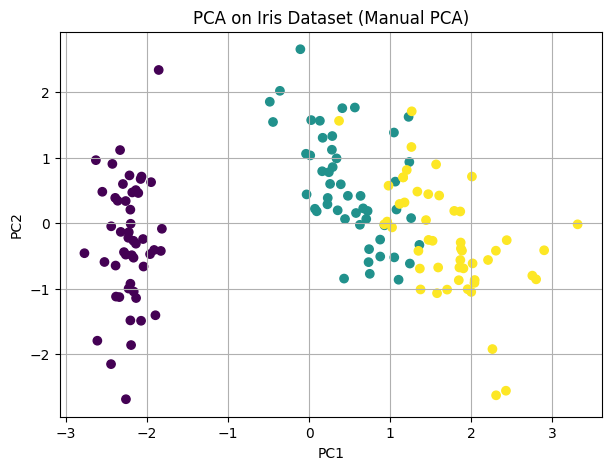



=== PART C: PCA using Scikit-Learn ===

Explained Variance Ratio (Sklearn PCA): [0.72962445 0.22850762]

Components (Eigenvectors):
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


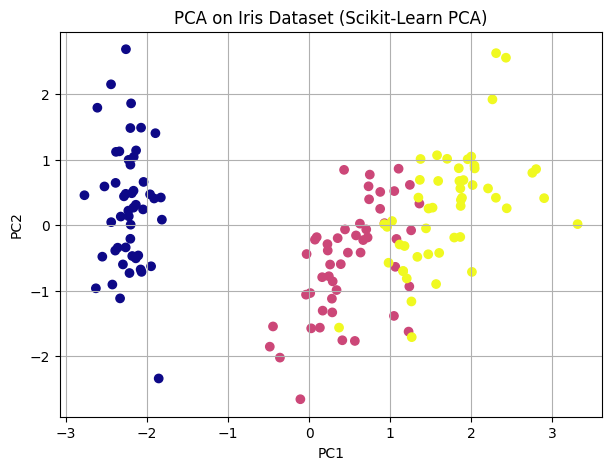

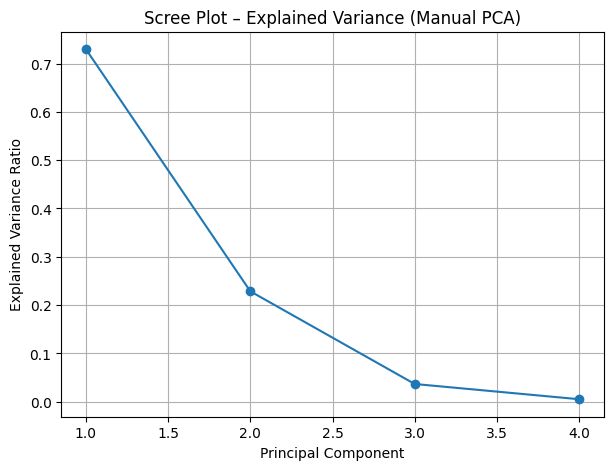

In [1]:
# ===============================================================
# FULL PCA IMPLEMENTATION — MANUAL + SKLEARN (COLAB VERSION)
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Make plots show correctly in Colab
%matplotlib inline


# ===============================================================
# PART A: PCA on 2×2 MATRIX (MANUAL)
# ===============================================================

print("=== PART A: Manual PCA on 2×2 Matrix ===\n")

# Example 2×2 matrix
X = np.array([[2, 0],
              [0, 2]], dtype=float)

# Step 1: Mean center the data
mean_vec = np.mean(X, axis=0)
X_centered = X - mean_vec

# Step 2: Covariance matrix
cov_mat = np.cov(X_centered.T)

# Step 3: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Step 4: Sort eigenvalues in descending order
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# Step 5: Transform data
Z_manual = X_centered.dot(eig_vecs)

print("Original Matrix:\n", X)
print("\nCentered Matrix:\n", X_centered)
print("\nCovariance Matrix:\n", cov_mat)
print("\nEigenvalues:\n", eig_vals)
print("\nEigenvectors:\n", eig_vecs)
print("\nTransformed Data:\n", Z_manual)


# ===============================================================
# PART B: MANUAL PCA ON IRIS DATASET
# ===============================================================

print("\n\n=== PART B: Manual PCA on Iris Dataset ===\n")

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 1: Standardize data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 2: Covariance matrix
cov_mat = np.cov(X_std.T)

# Step 3: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Step 4: Sort eigenvalues
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# Step 5: Explained variance ratio
explained_variance = eig_vals / np.sum(eig_vals)

# Step 6: Project onto first 2 components
W = eig_vecs[:, :2]
Z_iris_manual = X_std.dot(W)

print("Covariance Matrix:\n", cov_mat)
print("\nEigenvalues:\n", eig_vals)
print("\nExplained Variance Ratio:\n", explained_variance)
print("\nPrincipal Components (Top 2):\n", W)
print("\nTransformed Data (First 5 rows):\n", Z_iris_manual[:5])

# Scatter Plot for Manual PCA
plt.figure(figsize=(7,5))
plt.scatter(Z_iris_manual[:, 0], Z_iris_manual[:, 1], c=y, cmap='viridis')
plt.title("PCA on Iris Dataset (Manual PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


# ===============================================================
# PART C: PCA USING SCIKIT-LEARN
# ===============================================================

print("\n\n=== PART C: PCA using Scikit-Learn ===\n")

pca = PCA(n_components=2)
Z_iris_sklearn = pca.fit_transform(X_std)

print("Explained Variance Ratio (Sklearn PCA):", pca.explained_variance_ratio_)
print("\nComponents (Eigenvectors):\n", pca.components_)

# Plot sklearn PCA result
plt.figure(figsize=(7,5))
plt.scatter(Z_iris_sklearn[:,0], Z_iris_sklearn[:,1], c=y, cmap='plasma')
plt.title("PCA on Iris Dataset (Scikit-Learn PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


# ===============================================================
# PART D: SCREE PLOT (Explained Variance)
# ===============================================================

plt.figure(figsize=(7,5))
plt.plot(np.arange(1,5), explained_variance, marker='o')
plt.title("Scree Plot – Explained Variance (Manual PCA)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()
